<h1 style="text-align:center;font-size:40px;"> Final Project</h1> 

<h2> Problem statement :</h2>

Our client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. The money is invested for an agreed rate of interest over a fixed amount of
time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing
and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way
to reach out to people. However, they require huge investment as large call
centers are hired to actually execute these campaigns. Hence, it is crucial
to identify the customers most likely to convert beforehand so that they can
be specifically targeted via call.

We've been provided with the client data such as : age of the client, their job
type, their marital status, etc. Along with the client data, you are also
provided with the information of the call such as the duration of the call, day
and month of the call, etc. Given this information, your task is to predict if
the client will subscribe to term deposit.


<h2> Business perspective</h2>

Apart from a high accuracy, our focus should be to reduce the no.of false positives &  false negatives. 

A false positive would mean that the soecific customer won't be contacted further for subscribing to the schemes. **This leads to lowering of bank's outreach.**

On the other hand a false negative would mean that a client who has already subscribed would be repeatedly contacted for subscribing to the schemes. **This may annoy the client & they may revoke the services they are taking from the bank, i.e , close their accounts. This also isn't good for the bank.** 

<h2> 1) Data loading </h2>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [29]:
print("Train dims: ",train.shape)
print("Test dims: ", test.shape)

Train dims:  (31647, 18)
Test dims:  (13564, 17)


**Lets see if any of the attributes in the dataset contains NaN (Not a Number). If so then we'll have to take actions.**

In [37]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

**None of the columns contain NaNs !!!**

<h2> 2) Exploratory Data Analysis </h2>

It includes:

- Univariate analysis
- Bivariate analysis

<h3> 2.1) Univariate analysis</h3>

In [6]:
# Seeing the eldest & youngest depositor.
print("Maximum age: ",max(train["age"].values))
print("Minimum age: ",min(train["age"].values))

Maximum age:  95
Minimum age:  18


c:\users\smitr\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\smitr\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


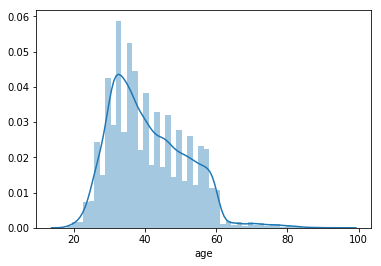

In [25]:
# Plotting the age-distribution of bank customers.
sns.distplot(train["age"])

**Observation :** Most people are aged 36-38 roughly.

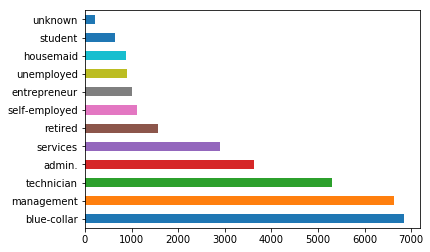

In [11]:
train["job"].value_counts().plot.barh()

**Observation :- It is observed that most of the clients belong to blue-collar job and the students are least in number. This is intuitive since students generally do not take a term deposit. Let's also look at how many clients have default history.**

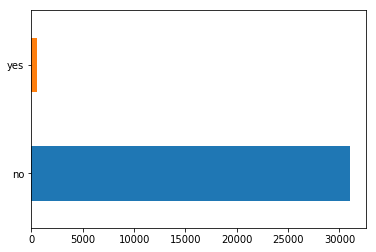

In [16]:
train["default"].value_counts().plot.barh()

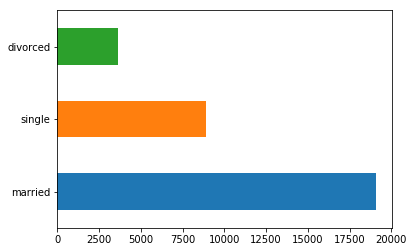

In [13]:
train["marital"].value_counts().plot.barh()

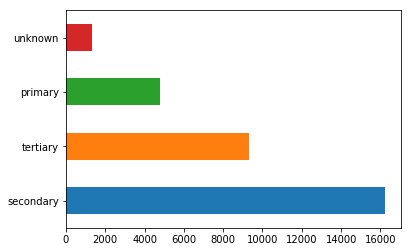

In [15]:
train["education"].value_counts().plot.barh()

**Observation :-** Most term-deposits are made by people who have tertiary & secondary education. Thus we do find that education plays an important role.

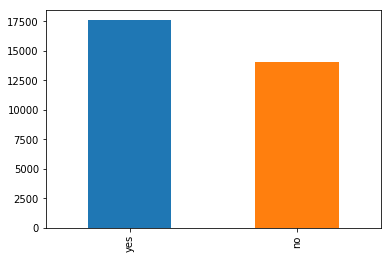

In [17]:
train["housing"].value_counts().plot.bar()

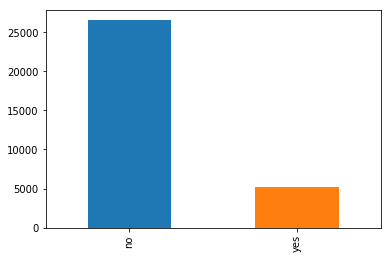

In [18]:
train["loan"].value_counts().plot.bar()

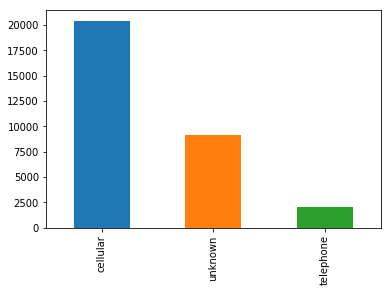

In [19]:
train["contact"].value_counts().plot.bar()

**Observation  :** Most of the customers use cell-phones.

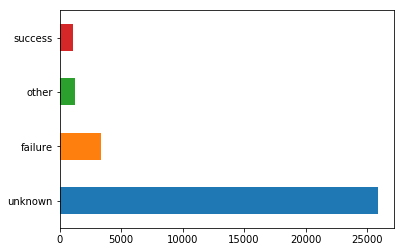

In [21]:
train["poutcome"].value_counts().plot.barh()

In [30]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

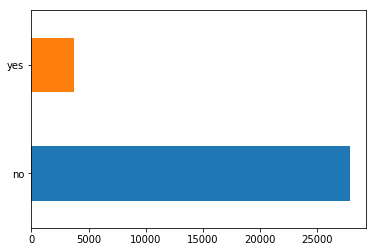

In [31]:
train["subscribed"].value_counts().plot.barh()

In [67]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

**We have a highly skewed data, almost 88% people haven't subscribed. Thus, even a dumb model can get 88% accuracy. An "intelligent" model should be able to do better than that.**

<h3> 2.2) Bivariate analysis </h3>

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

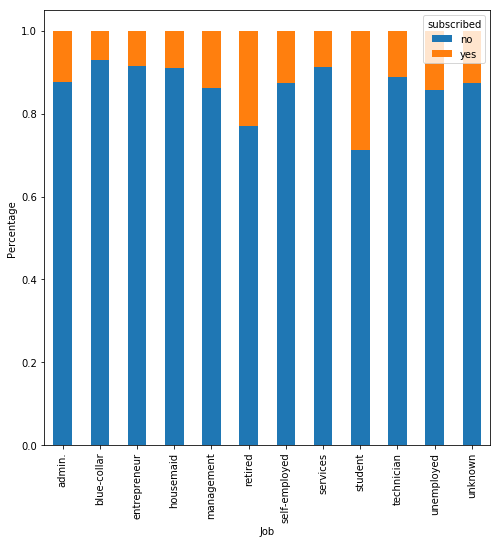

In [26]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

**Inference :-** From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

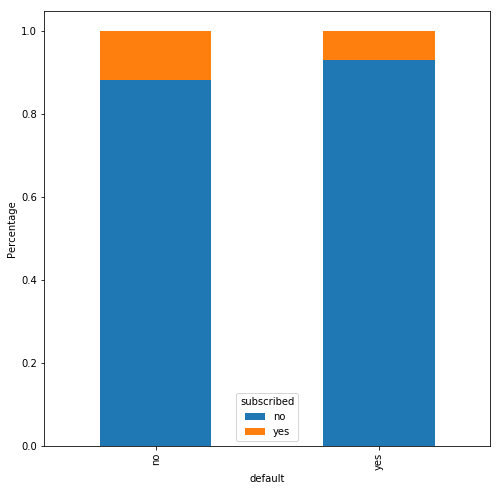

In [32]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

**Inference :-** We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [33]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

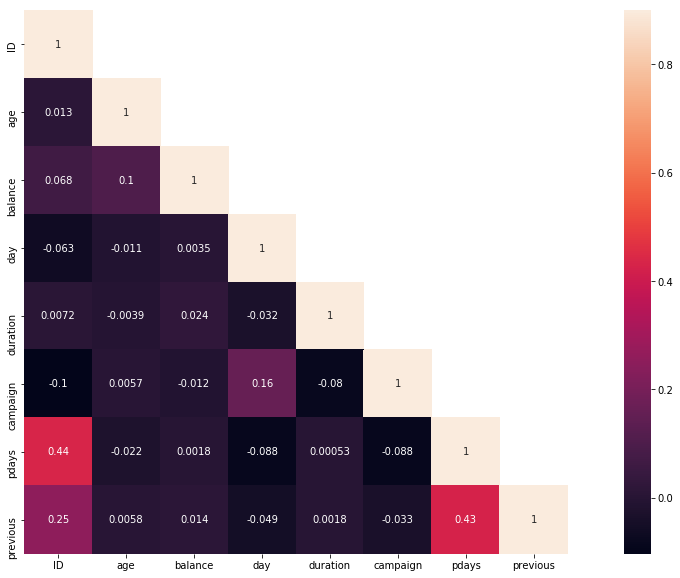

In [42]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True)

**Inference :-** We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

<h2> 3) Preparing data for training </h2>

In [43]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [44]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

<h3> 3.1) Train-Test split </h3>

We'll be performing an 80:20 split here.

In [45]:
from sklearn.model_selection import train_test_split

# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=2019)

print("Train shape: ",X_train.shape)
print("Validation shape: ",X_val.shape)

Train shape:  (25317, 52)
Validation shape:  (6330, 52)


<h2>4) Training ML models</h2>

Here I would be using the following machine learning models: 
- Logistic Regression
- Linear SVM
- Random forest

<h3> 4.1) Logistic Regression </h3>

In [46]:
from sklearn.linear_model import LogisticRegression

# defining the logistic regression model
log_clf = LogisticRegression()

# Training the model
log_clf.fit(X_train, y_train)

c:\users\smitr\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# making prediction on the validation set
prediction = log_clf.predict(X_val)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, prediction)

0.8908372827804107

**Wow 89% accuracy using just a simple linear model. That's great !!!** Now lets, look at the confusion matrix.

In [49]:
from sklearn.metrics import confusion_matrix

# This function plots the confusion matrices given y_true, y_predict.
def plot_confusion_matrix(test_y, predict_y,num_classes):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    plt.figure(figsize=(7,3))
    
    labels = [i for i in range(num_classes)]
    
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

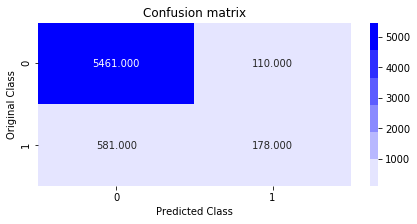

In [50]:
plot_confusion_matrix(y_val, prediction, 2)

**Although logistic regression has good accuracy , yet it has a high no.of false positives & false negatives.**

<h3> 4.2) Linear SVM </h3>

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [54]:
# Testing various values of hyperparameter
alpha = [10**x for x in range(-4,6)]

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=3)   # Using a hinge loss makes the classifer an SVM
    clf.fit(X_train, y_train)
    
    predict = clf.predict(X_val)
    print("Accuracy for alpha={} is {}".format(i,accuracy_score(y_val, predict)))

Accuracy for alpha=0.0001 is 0.8562401263823065
Accuracy for alpha=0.001 is 0.8796208530805687
Accuracy for alpha=0.01 is 0.8781990521327014
Accuracy for alpha=0.1 is 0.8786729857819905
Accuracy for alpha=1 is 0.7981042654028436
Accuracy for alpha=10 is 0.879304897314376
Accuracy for alpha=100 is 0.8796208530805687
Accuracy for alpha=1000 is 0.8800947867298579
Accuracy for alpha=10000 is 0.8800947867298579
Accuracy for alpha=100000 is 0.8800947867298579


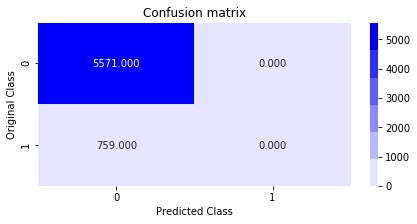

In [56]:
# Fitting model with best accuracy  & then plotting confusion matrix
clf = SGDClassifier(alpha=1000, penalty='l2', loss='hinge', random_state=3)
clf.fit(X_train, y_train)
predict = clf.predict(X_val)

plot_confusion_matrix(y_val, predict, 2)

**Seems as if the Linear SVM has a huge amount of bias since it only predicts 0. Thus although it has a good accuracy, it is actually a dumb model.**

<h3> 4.3) Random Forest model </h3>

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
num_trees = [10,20,50,100,200,400,1000]

for n_tree in num_trees:
    clf = RandomForestClassifier(n_estimators=n_tree)
    clf.fit(X_train, y_train)
    
    predict = clf.predict(X_val)
    print("No.of trees = {} , accuracy is {}".format(n_tree,accuracy_score(y_val, predict)))    

No.of trees = 10 , accuracy is 0.9020537124802528
No.of trees = 20 , accuracy is 0.9042654028436019
No.of trees = 50 , accuracy is 0.9042654028436019
No.of trees = 100 , accuracy is 0.9058451816745655
No.of trees = 200 , accuracy is 0.9071090047393365
No.of trees = 400 , accuracy is 0.9090047393364928
No.of trees = 1000 , accuracy is 0.9083728278041074


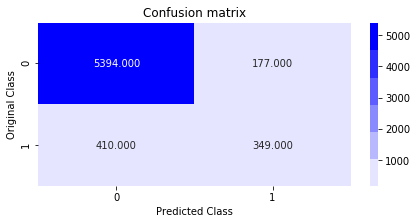

In [60]:
clf = RandomForestClassifier(n_estimators=400)
clf.fit(X_train, y_train)
    
predict = clf.predict(X_val)
plot_confusion_matrix(y_val, predict, 2)

**We have almost 91% accuracy in validation set. Now, lets use the test set.**

In [62]:
test = pd.get_dummies(test)
test_prediction = clf.predict(test)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [63]:
submission = pd.DataFrame()

# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [64]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [65]:
submission.to_csv('submission.csv', header=True, index=False)

**Using the solution checker we see that on test set we've a 91.175% accuracy. !!!**